In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Social_Network_Ads.csv')

In [3]:
df.head

<bound method NDFrame.head of       User ID  Gender  Age  EstimatedSalary  Purchased
0    15624510    Male   19            19000          0
1    15810944    Male   35            20000          0
2    15668575  Female   26            43000          0
3    15603246  Female   27            57000          0
4    15804002    Male   19            76000          0
..        ...     ...  ...              ...        ...
395  15691863  Female   46            41000          1
396  15706071    Male   51            23000          1
397  15654296  Female   50            20000          1
398  15755018    Male   36            33000          0
399  15594041  Female   49            36000          1

[400 rows x 5 columns]>

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [5]:
pd.crosstab(df.Gender, df.Purchased)

Purchased,0,1
Gender,,
Female,127,77
Male,130,66


In [6]:
df.Gender.value_counts()

Female    204
Male      196
Name: Gender, dtype: int64

In [7]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [8]:
x = df.iloc[:, [1, 2, 3]]
y = df.iloc[:, -1]

In [9]:
x

,Gender,Age,EstimatedSalary
0,Male,19,19000
1,Male,35,20000
2,Female,26,43000
3,Female,27,57000
4,Male,19,76000
...,...,...,...
395,Female,46,41000
396,Male,51,23000
397,Female,50,20000
398,Male,36,33000


In [10]:
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
x['Gender'] = le.fit_transform(x['Gender'])

In [12]:
x

,Gender,Age,EstimatedSalary
0,1,19,19000
1,1,35,20000
2,0,26,43000
3,0,27,57000
4,1,19,76000
...,...,...,...
395,0,46,41000
396,1,51,23000
397,0,50,20000
398,1,36,33000


In [13]:
from  sklearn.model_selection import train_test_split
x_tr, x_test, y_tr, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [21]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_tr = sc.fit_transform(x_tr)
x_test = sc.transform(x_test)
x_tr

array([[ 1.02532046e+00,  1.92295008e+00,  2.14601566e+00],
       [-9.75304830e-01,  2.02016082e+00,  3.78719297e-01],
       [-9.75304830e-01, -1.38221530e+00, -4.32498705e-01],
       [-9.75304830e-01, -1.18779381e+00, -1.01194013e+00],
       [-9.75304830e-01,  1.92295008e+00, -9.25023920e-01],
       [-9.75304830e-01,  3.67578135e-01,  2.91803083e-01],
       [-9.75304830e-01,  1.73156642e-01,  1.46942725e-01],
       [ 1.02532046e+00,  2.02016082e+00,  1.74040666e+00],
       [-9.75304830e-01,  7.56421121e-01, -8.38107706e-01],
       [-9.75304830e-01,  2.70367388e-01, -2.87638347e-01],
       [ 1.02532046e+00,  3.67578135e-01, -1.71750061e-01],
       [-9.75304830e-01, -1.18475597e-01,  2.20395980e+00],
       [-9.75304830e-01, -1.47942605e+00, -6.35303205e-01],
       [ 1.02532046e+00, -1.28500455e+00, -1.06988428e+00],
       [ 1.02532046e+00, -1.38221530e+00,  4.07691369e-01],
       [-9.75304830e-01, -1.09058306e+00,  7.55356227e-01],
       [ 1.02532046e+00, -1.47942605e+00

In [15]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(x_tr, y_tr)

GaussianNB()

In [16]:
pred = classifier.predict(x_test)

In [17]:
pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1], dtype=int64)

In [18]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, pred)
cm

array([[56,  2],
       [ 4, 18]], dtype=int64)

In [19]:
print(cm)

[[56  2]
 [ 4 18]]


<AxesSubplot:>

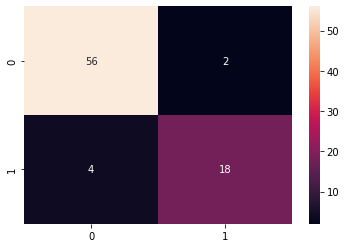

In [20]:
sns.heatmap(cm, annot = True)

In [22]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, pred)
score

0.925